In [4]:
# 필요한 모듈과 데이터 불러오기
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from warnings import filterwarnings
filterwarnings('ignore')
cancer = pd.read_csv('../data/dtm_matrix_origin.csv', encoding='cp949')
columns = cancer.columns
df = pd.DataFrame(cancer, columns=columns)
df.head(3)

,10,12,31,365,42,bu,bye,dalalala,ho,know,...,희뿌연,힘겨운,힘겨워,힘겹,힘내,힘든,힘든_새로움_버렸,힘든데,힘들,이별유무
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
columns[-1]


'이별유무'

In [8]:
from sklearn.tree import DecisionTreeClassifier

# 보팅 적용을 위한 개별 모델은 로지스틱 회귀와 KNN
model_lr = LogisticRegression()
model_knn = KNeighborsClassifier(n_neighbors=2)
model_tree = DecisionTreeClassifier(max_depth=4, random_state=0)

# 개별모델을 소프트보팅 기반의 앙상블 모델로 구현한 분류기
model_voting = VotingClassifier(estimators=[('LogisticRegression', model_lr),
                                            ('knn', model_knn),
                                            ('tree', model_tree) ], 
                                voting='soft')

# 데이터를 훈련셋과 테스트셋으로 나누기
X = cancer.iloc[:,:-1]
y = cancer.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42, 
                                                    test_size=0.2)
# 보팅 분류기의 학습/예측/평가
model_voting.fit(X_train, y_train)
model_voting.score(X_train, y_train), model_voting.score(X_test, y_test)

(973, 3651)


(0.9987146529562982, 0.7897435897435897)

In [16]:
# 개별 모델의 학습/예측/평가
for m in [model_lr, model_knn, model_tree]:
  m.fit(X_train, y_train)
  print(m.__class__.__name__,  m.score(X_train, y_train), m.score(X_test, y_test) )

LogisticRegression 1.0 0.9641025641025641
KNeighborsClassifier 0.9125964010282777 0.9230769230769231
DecisionTreeClassifier 0.9344473007712082 0.9230769230769231


In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# 데이터 로드
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=0)

# 모델 학습
model = RandomForestClassifier(n_estimators=100, n_jobs=4,
                               max_features=11, 
                               max_depth=6, 
                               random_state=0)
model.fit(X_train, y_train)
# 평가
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9190672153635117, 0.9016393442622951)

0.9190672153635117
0.9190672153635117
0.9016393442622951


<AxesSubplot:>

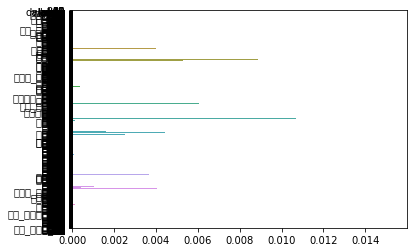

In [14]:
import seaborn as sns
# 모델 학습
model = RandomForestClassifier(n_estimators=100, 
                               max_features=3,
                               max_depth=3,  
                               oob_score=True,
                               random_state=0)
model.fit(X_train, y_train)
# 평가
print( model.score(X_train, y_train) )
print( model.oob_score_ )
print( model.score(X_test, y_test) )

# 결정함수는 각 훈련 샘플의 클래스 확률을 반환 
# (predict_proba()가 기반이 되는 예측기 모델에 존재하기 때문)
# print("OOB 샘플의 결정 함수값:" , model.oob_decision_function_)
len(model.oob_decision_function_)

# 특성 중요도 시각화
sns.barplot(x=model.feature_importances_, y=columns[:-1])